In [1]:
import sys
if '/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon' not in sys.path:
    sys.path.insert(0, '/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon')
    
%load_ext autoreload
%autoreload 2

# initial tests

In [2]:
from deepface import DeepFace
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [3]:
df = DeepFace.find(img_path="../face_detection/test_images/test_chris.jpg", db_path="../face_detection/database")

There are  3  representations found in  representations_vgg_face.pkl
find function lasts  1.8332679271697998  seconds


In [4]:
df

identity  \
0  ../face_detection/database/Chris_Hemsworth/chris_hemsworth.jpg   
1     ../face_detection/database/Chris_Hemsworth/test_chris_2.jpg   

   VGG-Face_cosine  
0         0.072737  
1         0.195394

In [5]:
import sys
import os
for item in sys.path:
    print(item)
print(os.getcwd())

/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon
/media/arthur/DATA/Code/projects/16_facial_recognition/venv/lib/python39.zip
/media/arthur/DATA/Code/projects/16_facial_recognition/venv/lib/python3.9
/media/arthur/DATA/Code/projects/16_facial_recognition/venv/lib/python3.9/lib-dynload

/media/arthur/DATA/Code/projects/16_facial_recognition/venv/lib/python3.9/site-packages
/media/arthur/DATA/Code/projects/16_facial_recognition/venv/lib/python3.9/site-packages/IPython/extensions
/home/arthur/.ipython
/media/arthur/DATA/Code/projects/16_facial_recognition/face_recognition_project_simplon


## tests functions.load_image

In [6]:
from deepface.commons import functions
# import cv2
import matplotlib.pyplot as plt

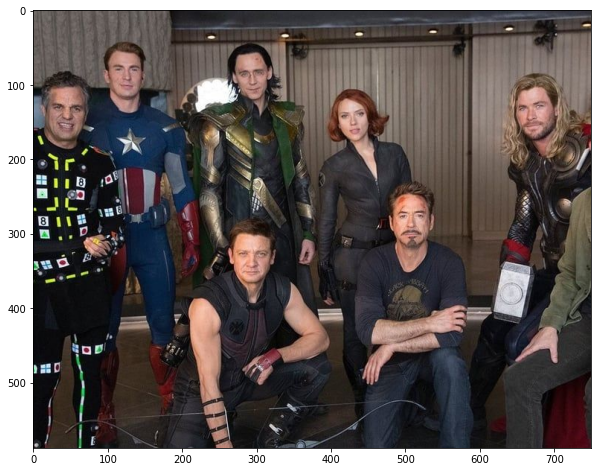

In [7]:
cv2_img = functions.load_image("../face_detection/test_images/test2.jpg")
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])

In [8]:
type(cv2_img), cv2_img.dtype

(numpy.ndarray, dtype('uint8'))

**functions.load_image**: 
- inputs: the absolute path to an image
- returns: the BGR (cv2 format) uint8 numpy array representing the image

## tests OpenCvWrapper.detect_faces

In [9]:
from deepface.detectors import OpenCvWrapper

In [10]:
detected_face, region = OpenCvWrapper.detect_face(OpenCvWrapper.build_model(), cv2_img, align=True)

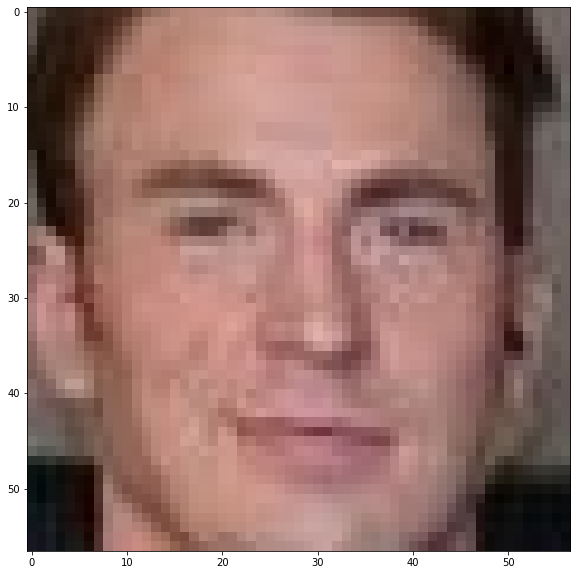

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(detected_face[:, :, ::-1])

In [12]:
region # x, y (from top left of image), w, h

[96, 57, 57, 57]

**detectors.*Wrapper**:
- input: built model, image array, align
- output: single face image array and region

gotta make the new function output a list of face images and regions

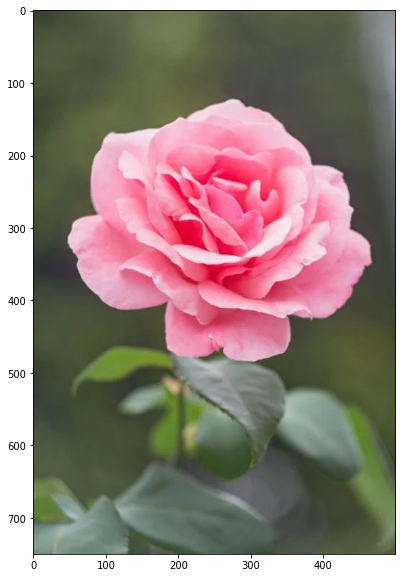

In [13]:
flower_img = functions.load_image("../face_detection/test_images/test_flower.jpg")
plt.figure(figsize=(10,10))
plt.imshow(flower_img[:, :, ::-1])

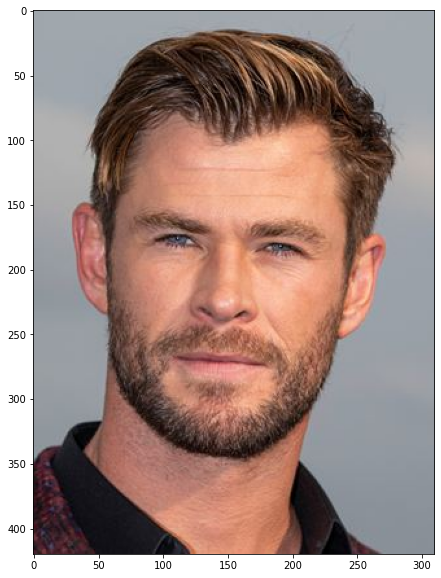

In [14]:
chris_img = functions.load_image("../face_detection/test_images/test_chris.jpg")
plt.figure(figsize=(10,10))
plt.imshow(chris_img[:, :, ::-1])

In [15]:
detected_faces_list, img_regions_list = OpenCvWrapper.detect_faces(OpenCvWrapper.build_model(), cv2_img, align=True)

7 faces found


In [16]:
len(img_regions_list)

7

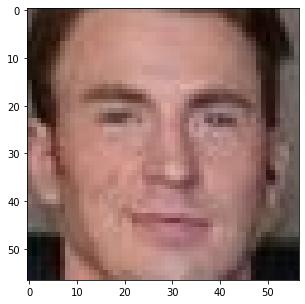

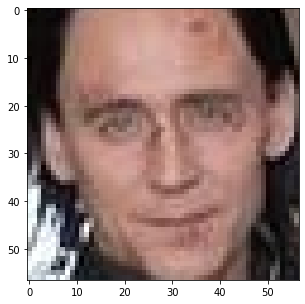

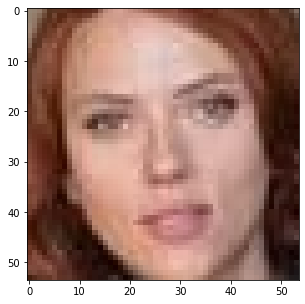

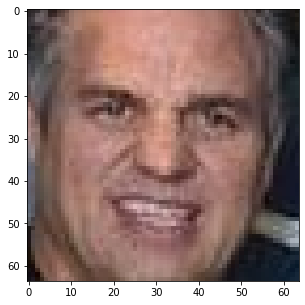

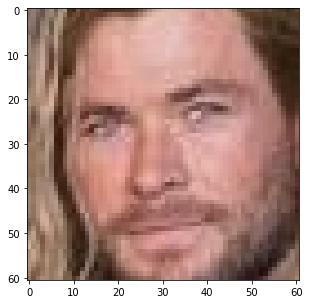

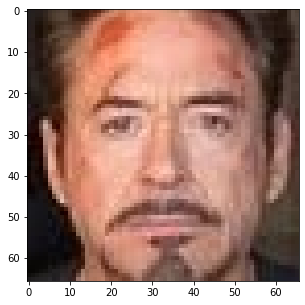

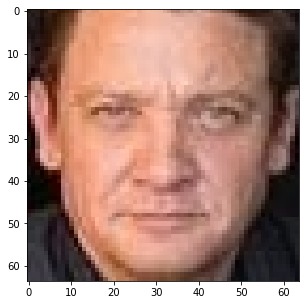

In [17]:
for face_img in detected_faces_list:
    plt.figure(figsize=(5,5))
    plt.imshow(face_img[:, :, ::-1])
    plt.show()

## tests functions.draw_boxes

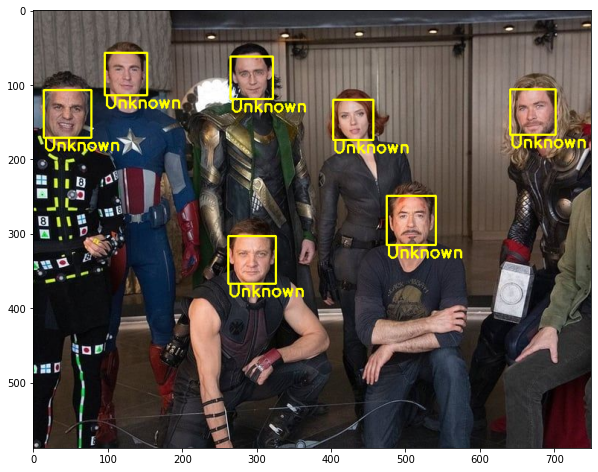

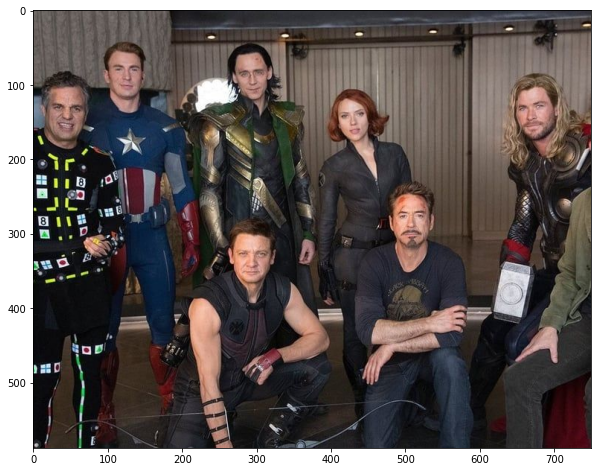

In [18]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list, color=(0,255,255))
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests FaceDetector.detect_faces

In [19]:
from deepface.detectors import FaceDetector

In [20]:
detected_faces_images, img_regions_list = FaceDetector.detect_faces(FaceDetector.build_model('opencv'), 'opencv', cv2_img)

7 faces found


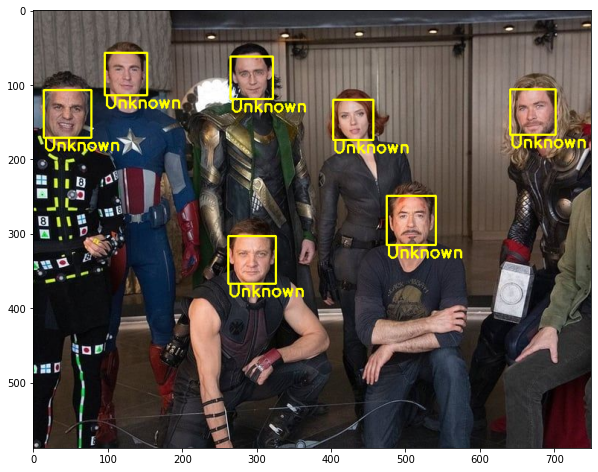

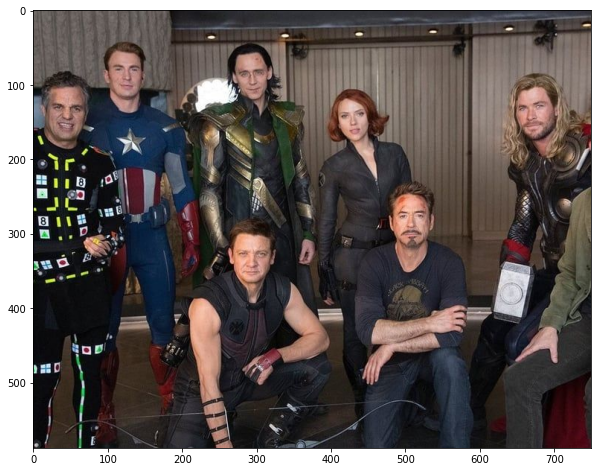

In [21]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list, color=(0,255,255))
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()

## tests functions.detect_faces

In [22]:
detected_faces_images, img_regions_list = functions.detect_faces(cv2_img, detector_backend='opencv')

7 faces found


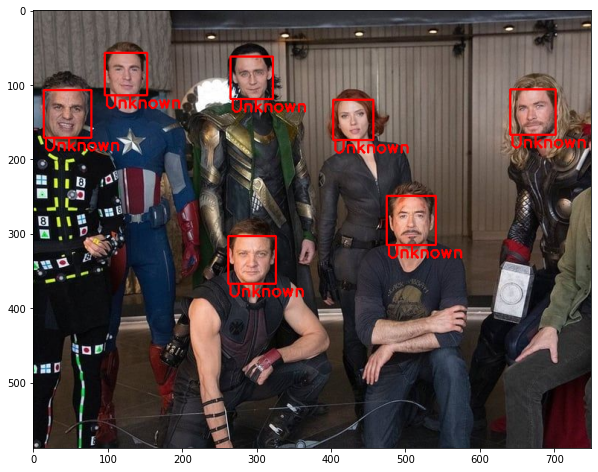

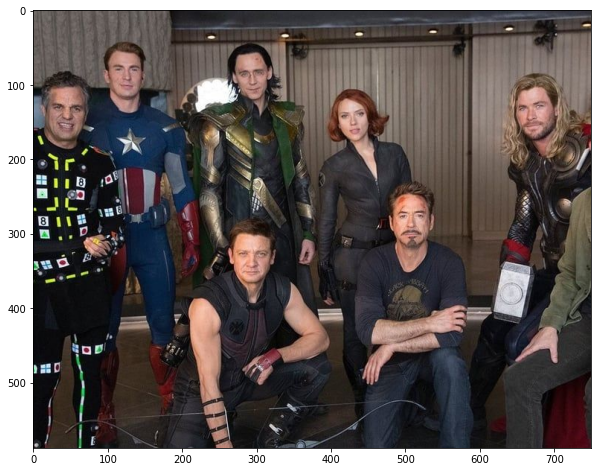

In [23]:
img_with_boxes = functions.draw_boxes(cv2_img, img_regions_list)
plt.figure(figsize=(10,10))
plt.imshow(img_with_boxes[:, :, ::-1])
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(cv2_img[:, :, ::-1])
plt.show()